[statistics-module](https://docs.python.org/3/library/statistics.html)

### Mean

In [2]:
def compute_mean(*args):
    return sum(args) / len(args)

print(f"compute_mean: {compute_mean(1, 2, 3, 4, 5)}")

compute_mean: 3.0


In [3]:
from statistics import mean, fmean

# mean() - Arithmetic mean (“average”) of data.
print(f"mean: {mean([1, 2, 3, 4, 5])}")

# fmean() - Fast, floating point arithmetic mean, with optional weighting.
print(f"fmean: {fmean([1, 2, 3, 4, 5])}")

mean: 3
fmean: 3.0


### Weighted Mean

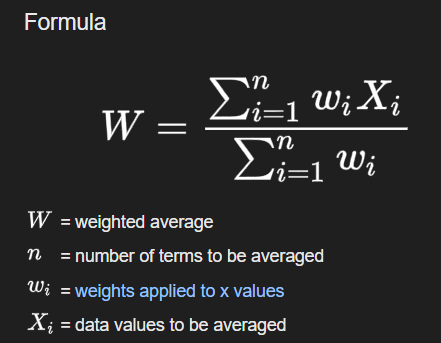

In [4]:
# Optional weighting of fmean() is supported from version 3.11. 

## For example, a professor assigns a grade for a course 
## by weighting quizzes at 20%, homework at 20%, a midterm exam at 30%, 
## and a final exam at 30%:
grades = [85, 92, 83, 91]
weights = [0.20, 0.20, 0.30, 0.30]
print(f"fmean with weights: {fmean(grades, weights)}")

# My implementation of `fmean()` -> weighted_average
def compute_fmean(data, weights):
    weighted_sum = sum(d * w for d, w in zip(data, weights))
    total_weight = sum(weights)
    return weighted_sum / total_weight

print(f"my implementation of fmean with weights: {compute_fmean(grades, weights)}")


fmean with weights: 87.6
my implementation of fmean with weights: 87.6


### Median

In [5]:
def compute_median(*args):
    n = len(args)
    # Sorting
    s_args = tuple(sorted(args))
    """
     NOTE: Since python follows 0 based indexing,
     Odd: the middle is at index
        (n+1)/2 => (n+1)/2 - 1 => (n-1)/2
     Even: the middle is at indices
        (n/2) + 1 => (n/2) + 1 - 1 => n/2 
        (n/2) => (n/2) - 1
    """
    if n%2 == 0: # even
        mid_1 =  s_args[(n//2)-1]
        mid_2 = s_args[n//2]
        return (mid_1 + mid_2) / 2
    else: # odd
        return s_args[(n-1)//2]


print(f"compute_median: {compute_median(1, 2, 3, 4, 5, 6, 7, 8)}")
print(f"compute_median: {compute_median(1, 2, 3, 4, 5, 6, 7)}")

compute_median: 4.5
compute_median: 4


In [6]:
def compute_median(*args):
    n = len(args)
    # Sorting
    s_args = tuple(sorted(args))

    mid_idx = (n-1)//2 # Correctly identifies the middle index for both even and odd n
    if n%2 == 0: # even
        mid_idx_next = mid_idx + 1
        return (s_args[mid_idx] + s_args[mid_idx_next]) / 2
    else: # odd
        return s_args[mid_idx]


print(f"compute_median: {compute_median(1, 2, 3, 4, 5, 6, 7, 8)}")
print(f"compute_median: {compute_median(1, 2, 3, 4, 5, 6, 7)}")

compute_median: 4.5
compute_median: 4


In [7]:
from statistics import median, median_low, median_high

print(f"Median (even): {median([1, 2, 3, 4, 5, 6, 7, 8])}")
print(f"Median (odd): {median([1, 2, 3, 4, 5, 6, 7])}")

# When the number of data points is odd, the middle value is returned. 
# When it is even, the smallest of the two middle values is returned.
print(f"Median Low (odd): {median_low([1, 2, 3, 4, 5, 6, 7, 8])}")

# When the number of data points is odd, the middle value is returned. 
# When it is even, the larger of the two middle values is returned.
print(f"Median High (odd): {median_high([1, 2, 3, 4, 5, 6, 7, 8])}")

Median (even): 4.5
Median (odd): 4
Median Low (odd): 4
Median High (odd): 5


### Mode

In [8]:
def compute_mode(*args):
    
    freq_dict = dict()
    for i in args:
        if i in freq_dict:
            freq_dict[i] +=1
        else:
            freq_dict[i] = 1

    max_counts = max(freq_dict.values())

    return [k for k, v in freq_dict.items() if v == max_counts]
        

print(f"compute_mode: {compute_mode(1, 2, 3, 4, 5, 6, 7, 7, 7, 8)}")
print(f"compute_mode: {compute_mode(1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 6, 7)}")

compute_mode: [7]
compute_mode: [3, 4]


In [9]:
def compute_mode(*args):    
    freq_dict = {i: args.count(i) for i in args}
    return [k for k, v in freq_dict.items() if v == max(freq_dict.values())]
        

print(f"compute_mode: {compute_mode(1, 2, 3, 4, 5, 6, 7, 7, 7, 8)}")
print(f"compute_mode: {compute_mode(1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 6, 7)}")

compute_mode: [7]
compute_mode: [3, 4]


In [10]:
from statistics import mode, multimode

# `mode()`- Single mode (most common value) of discrete or nominal data.
print(f"Mode: {mode([1, 2, 3, 4, 5, 6, 7, 7, 7, 8])}")
print(f"Mode: {mode([1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 6, 7])}")

# `multimode()` - List of modes (most common values) of discrete or nominal data.
print(f"Multimode: {multimode([1, 2, 3, 4, 5, 6, 7, 7, 7, 8])}")
print(f"Multimode: {multimode([1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 6, 7])}")

Mode: 7
Mode: 3
Multimode: [7]
Multimode: [3, 4]


### Variance

In [11]:
# Sample Variance
def compute_variance(*args):
    mean = compute_mean(*args)
    return sum([(mean - i)**2 for i in args]) / (len(args)-1)

print(f"compute_variance: {compute_variance(0.0, 0.25, 0.25, 1.25, 1.5, 1.75, 2.75, 3.25)}")
print(f"compute_variance: {compute_variance(2.75, 1.75, 1.25, 0.25, 0.5, 1.25, 3.5)}")

compute_variance: 1.4285714285714286
compute_variance: 1.3720238095238095


In [12]:
# Population variance
def compute_pvariance(*args):
    n = len(args)
    mean = sum(args) / n
    return sum([(mean - i)**2 for i in args]) / n

print(f"compute_pvariance: {compute_pvariance(0.0, 0.25, 0.25, 1.25, 1.5, 1.75, 2.75, 3.25)}")
print(f"compute_pvariance: {compute_pvariance(2.75, 1.75, 1.25, 0.25, 0.5, 1.25, 3.5)}")

compute_pvariance: 1.25
compute_pvariance: 1.1760204081632655


In [13]:
from statistics import mean, variance, pvariance

# Sample variance
data = [0.0, 0.25, 0.25, 1.25, 1.5, 1.75, 2.75, 3.25]

print(f"Variance: {variance(data)}")

m = mean(data)
print(f"Variance: {variance(data, m)}")

# Population variance
data = [2.75, 1.75, 1.25, 0.25, 0.5, 1.25, 3.5]

print(f"Pvariance: {pvariance(data)}")

m = mean(data)
print(f"Pvariance: {pvariance(data, m)}")

Variance: 1.4285714285714286
Variance: 1.4285714285714286
Pvariance: 1.1760204081632653
Pvariance: 1.1760204081632653


### Standard Deviation

In [14]:
from math import sqrt

In [15]:
# Sammple Standard Deviation
def compute_stdev(*args):
    return sqrt(compute_variance(*args))

print(f"compute_stdev: {compute_stdev(1.5, 2.5, 2.5, 2.75, 3.25, 4.75)}")

compute_stdev: 1.0810874155219827


In [16]:
# population Standard Deviation
def compute_pstdev(*args):
    return sqrt(compute_pvariance(*args))

print(f"compute_pstdev: {compute_pstdev(1.5, 2.5, 2.5, 2.75, 3.25, 4.75)}")

compute_pstdev: 0.986893273527251


In [17]:
from statistics import stdev, pstdev

data = [1.5, 2.5, 2.5, 2.75, 3.25, 4.75]
print(f"stdev: {stdev(data)}")
print(f"pstdev: {pstdev(data)}")

stdev: 1.0810874155219827
pstdev: 0.986893273527251


### Coefficient of Variation

In [18]:
def compute_coefficient_variation(args):
    cv = compute_stdev(*args) / compute_mean(*args)
    return round(cv, 4)

miles = [3, 4, 4.5, 3.5]
km = [4.828, 6.437, 7.242, 5.632]

cv_miles = compute_coefficient_variation(miles)
print(f"Coefficient Variation of Miles: {cv_miles}")
cv_km = compute_coefficient_variation(km)
print(f"Coefficient Variation of Km: {cv_km}")

if (cv_miles == cv_km):
    print(f"Coefficient Variation (Both): {cv_miles*100}%")

Coefficient Variation of Miles: 0.1721
Coefficient Variation of Km: 0.1721
Coefficient Variation (Both): 17.21%


### Covariance

In [43]:
def compute_covariance(*args):
    if len(args[0]) != len(args[1]):
        raise ValueError("Both inputs must be of the same length (no less than two)")
    n = len(args[0])
    x_bar =  compute_mean(*args[0])
    y_bar = compute_mean(*args[1])
    cov = sum(((x - x_bar)*(y - y_bar)) for x, y in zip(*args)) / (n-1)
    return round(cov, 1)

market_cap = 1532, 1488, 1343, 928, 615
earnings = 58, 35, 75, 41, 17

cov_MC_E = compute_covariance(market_cap, earnings)
print(f"Covariance: {cov_MC_E}")

if cov_MC_E > 0:
    print("Positive covariance (increases / moving together)")
elif cov_MC_E < 0:
    print("Negative covariance (decreases / moving in opposite direction)")
else: # cov_MC_E = 0 
    print("Independent")

Covariance: 5803.2
Positive covariance (increases / moving together)


In [32]:
from statistics import covariance

print(f"Covariance: {covariance(market_cap, earnings)}")

Covariance: 5803.2


### Correlation Coefficient

In [44]:
def compute_correlation(*args):
    r = compute_covariance(*args) / (compute_stdev(*args[0])*compute_stdev(*args[1]))
    return round(r, 4)

r_MC_E = compute_correlation(market_cap, earnings)
print(f"Correlation (Pearson's): {r_MC_E}")

if round(r_MC_E) == 1:
    print("Perfect positive linear relationship")
elif round(r_MC_E) == -1:
    print("Perfect negative linear relationship")
elif round(r_MC_E) == 0:
    print("No linear relationship")

Correlation (Pearson's): 0.6601
Perfect positive linear relationship


In [41]:
from statistics import correlation

print(f"Correlation (Pearson's): {round(correlation(market_cap, earnings), 4)}")

Covariance: 0.6601


---